In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as p
import warnings
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, auc
warnings.filterwarnings('ignore')

In [ ]:
!unzip hairfall.zip -d /content/hairfall

Archive:  hairfall.zip
  inflating: /content/hairfall/hair-nohair/test/row-1-column-1 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-1-column-12 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-11-column-12 - Copy - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-11-column-2 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-11-column-3 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-11-column-7.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-12-column-4.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-2-column-12 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-2-column-6 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/test/row-3-column-4 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/train/hair/row-11-column-1 - Copy.jpg  
  inflating: /content/hairfall/hair-nohair/train/hair/row-11-column-10.jpg  
  inflating: /content/hairfall/hair-nohair/train/hair/ro

In [ ]:
base_dir = '/content/hairfall/hair-nohair'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validate')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Function to count images in directories with subcategories
def count_images(directory, subdirs=True):
    if subdirs:
        categories = ['hair', 'nohair']
        counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    else:
        counts = len(os.listdir(directory))
    return counts

train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)
test_counts = count_images(test_dir, subdirs=False)

print("Train set counts:", train_counts)
print("Validation set counts:", validation_counts)
print("Test set counts:", test_counts)

total_train_images = sum(train_counts.values())
total_validation_images = sum(validation_counts.values())
total_test_images = test_counts

print("Total images in train set:", total_train_images)
print("Total images in validation set:", total_validation_images)
print("Total images in test set:", total_test_images)

Train set counts: {'hair': 26, 'nohair': 26}
Validation set counts: {'hair': 10, 'nohair': 10}
Test set counts: 10
Total images in train set: 52
Total images in validation set: 20
Total images in test set: 10


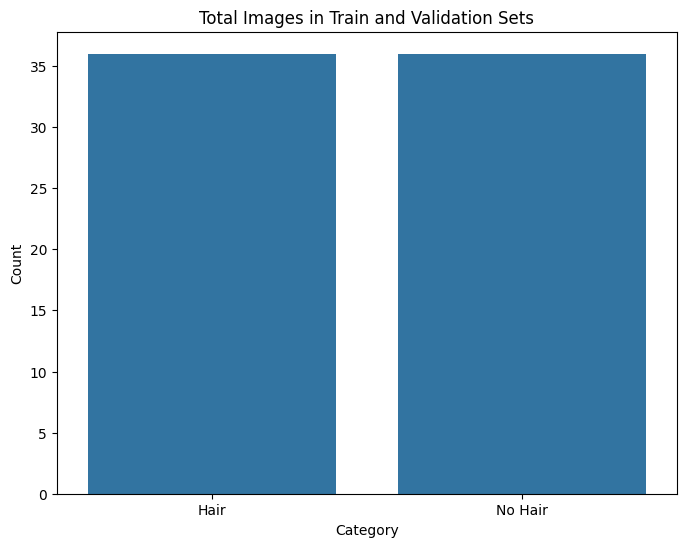

In [ ]:
# Count plot of total images (train + validation) of hair and no hair
total_counts = {
    'hair': train_counts['hair'] + validation_counts['hair'],
    'nohair': train_counts['nohair'] + validation_counts['nohair']
}

# Create a DataFrame for the counts
data_total = {
    'Category': ['Hair', 'No Hair'],
    'Count': [total_counts['hair'], total_counts['nohair']]
}

df_total = pd.DataFrame(data_total)

plt.figure(figsize=(8, 6))
sns.barplot(data=df_total, x='Category', y='Count')
plt.title('Total Images in Train and Validation Sets')
plt.show()

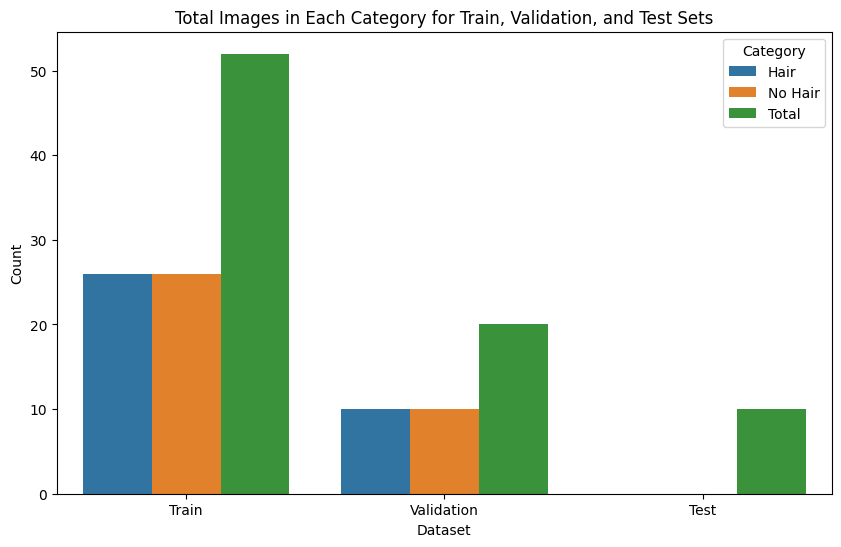

In [ ]:
# Create a DataFrame for the counts of train, validation, and test sets
data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Hair': [train_counts['hair'], validation_counts['hair'], 0],  # Test set does not have categories
    'No Hair': [train_counts['nohair'], validation_counts['nohair'], 0],  # Test set does not have categories
    'Total': [total_train_images, total_validation_images, total_test_images]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Dataset', value_vars=['Hair', 'No Hair', 'Total'], var_name='Category', value_name='Count')

# Plot the count plot of train, validation, and test sets
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Dataset', y='Count', hue='Category')
plt.title('Total Images in Each Category for Train, Validation, and Test Sets')
plt.show()

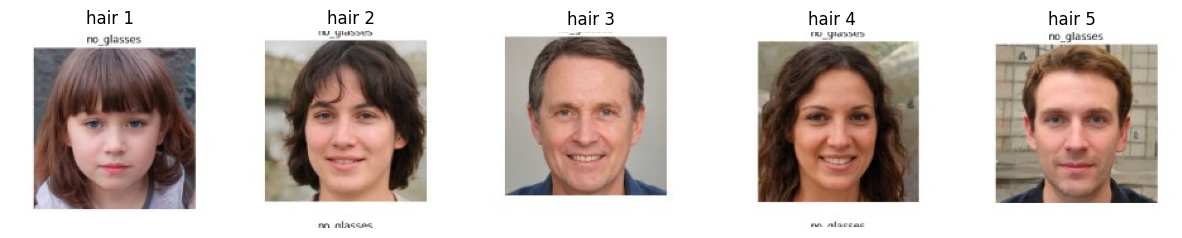

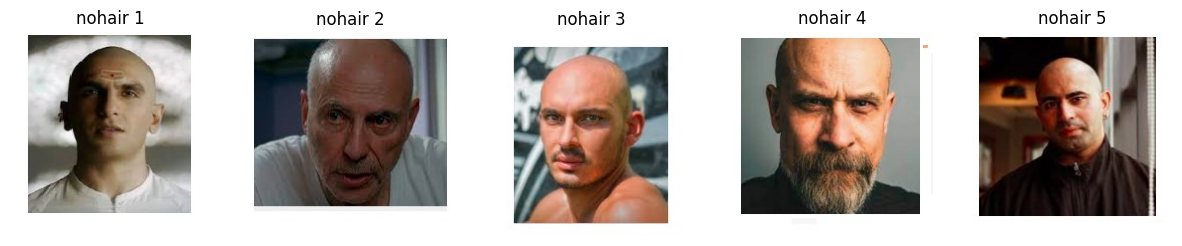

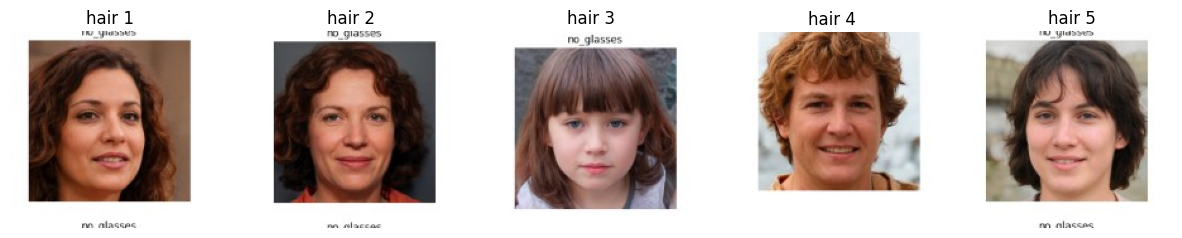

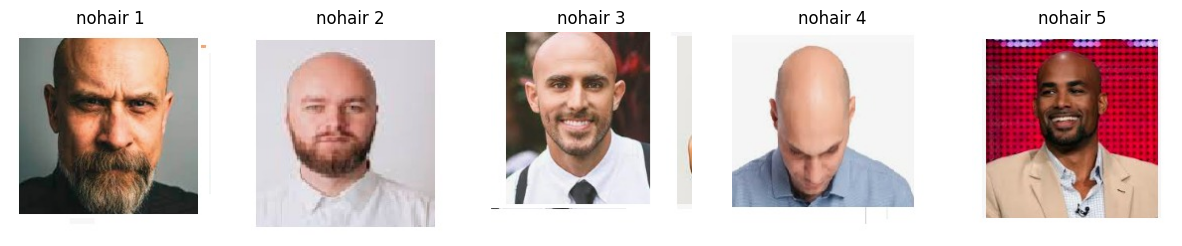

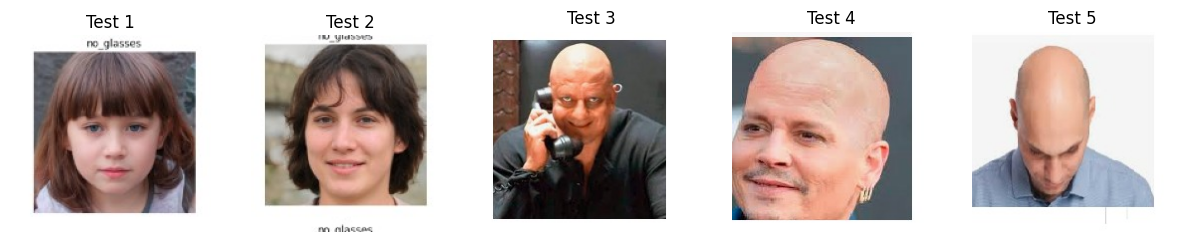

In [ ]:
import matplotlib.image as mpimg
def display_images(directory, category=None, num_images=5):
    if category:
        category_dir = os.path.join(directory, category)
    else:
        category_dir = directory

    images = os.listdir(category_dir)[:num_images]

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_dir, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"{category or 'Test'} {i+1}")
        plt.axis('off')
    plt.show()

# Display images from train set
display_images(train_dir, 'hair')
display_images(train_dir, 'nohair')

# Display images from validation set
display_images(validation_dir, 'hair')
display_images(validation_dir, 'nohair')
# Display images from test set
display_images(test_dir)

In [ ]:
# Function to get image dimensions
def get_image_dimensions(directory, category=None):
    if category:
        category_dir = os.path.join(directory, category)
    else:
        category_dir = directory

    dimensions = []
    for img_name in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_name)
        img = mpimg.imread(img_path)
        dimensions.append(img.shape)

    return dimensions

# Get image dimensions for train set
train_hair_dimensions = get_image_dimensions(train_dir, 'hair')
train_nohair_dimensions = get_image_dimensions(train_dir, 'nohair')

# Convert to numpy array for easier manipulation
train_hair_dimensions = np.array(train_hair_dimensions)
train_nohair_dimensions = np.array(train_nohair_dimensions)

# Display image dimensions for hair and no hair
print("Train Hair Image Dimensions (Height, Width, Channels):")
print(train_hair_dimensions)

print("\nTrain No Hair Image Dimensions (Height, Width, Channels):")
print(train_nohair_dimensions)

Train Hair Image Dimensions (Height, Width, Channels):
[[156 159   3]
 [156 159   3]
 [155 159   3]
 [156 160   3]
 [155 159   3]
 [156 160   3]
 [156 159   3]
 [155 160   3]
 [156 159   3]
 [156 160   3]
 [155 160   3]
 [155 160   3]
 [155 159   3]
 [156 159   3]
 [156 159   3]
 [155 159   3]
 [155 159   3]
 [155 160   3]
 [156 160   3]
 [156 160   3]
 [156 159   3]
 [155 159   3]
 [156 159   3]
 [155 159   3]
 [156 159   3]
 [155 159   3]]

Train No Hair Image Dimensions (Height, Width, Channels):
[[206 202   3]
 [206 203   3]
 [206 203   3]
 [206 202   3]
 [206 202   3]
 [206 203   3]
 [206 202   3]
 [206 202   3]
 [206 203   3]
 [206 202   3]
 [206 202   3]
 [206 202   3]
 [206 202   3]
 [206 202   3]
 [206 203   3]
 [206 202   3]
 [206 202   3]
 [206 202   3]
 [206 203   3]
 [206 203   3]
 [206 203   3]
 [206 202   3]
 [206 202   3]
 [206 203   3]
 [206 203   3]
 [206 203   3]]


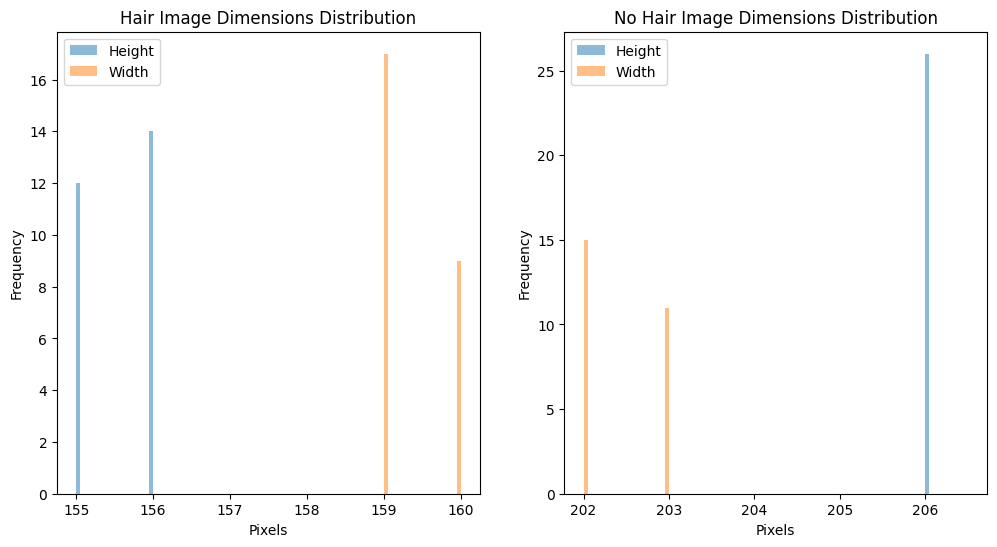

In [ ]:
# Plot image dimensions distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_hair_dimensions[:, 0], bins=20, alpha=0.5, label='Height')
plt.hist(train_hair_dimensions[:, 1], bins=20, alpha=0.5, label='Width')
plt.title('Hair Image Dimensions Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(train_nohair_dimensions[:, 0], bins=20, alpha=0.5, label='Height')
plt.hist(train_nohair_dimensions[:, 1], bins=20, alpha=0.5, label='Width')
plt.title('No Hair Image Dimensions Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()

plt.show()

Found 52 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


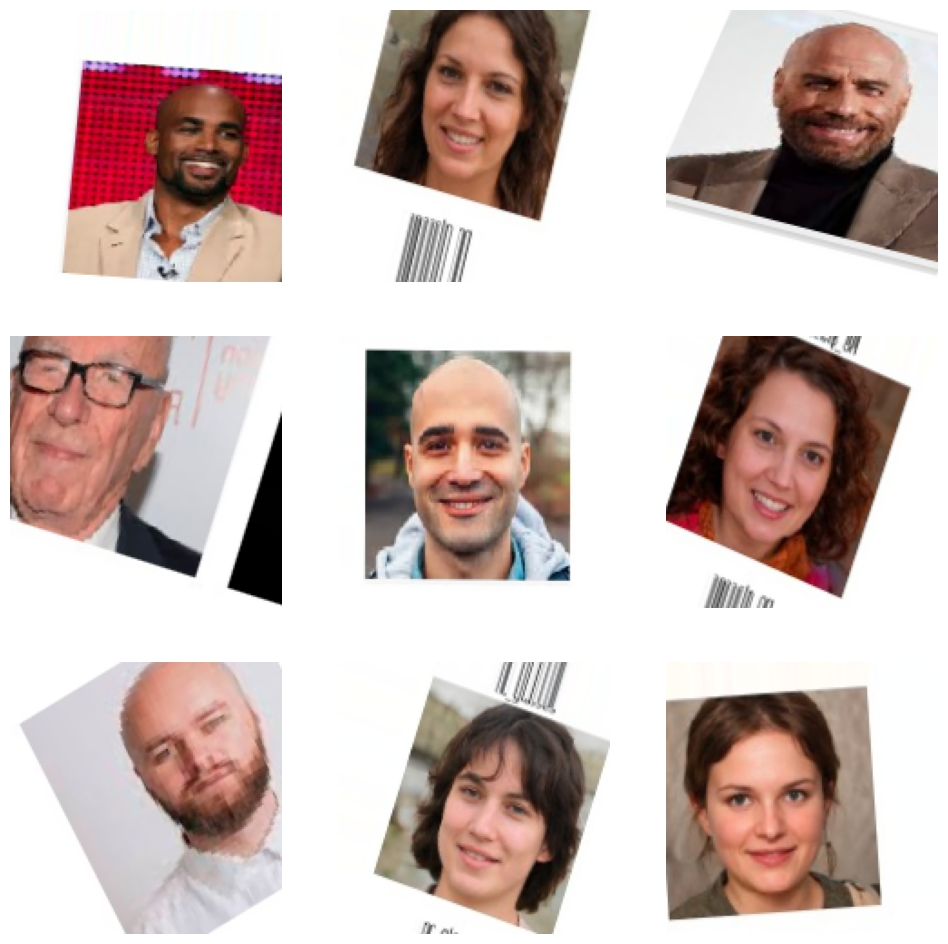

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Image data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image data generator for validation (no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


# Display some augmented images
def display_augmented_images(generator):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Plot the images
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Display augmented images from train set
display_augmented_images(train_generator)


Epoch 1/10
2/2 [==============================] - 5s 1s/step - loss: 3.0055 - accuracy: 0.4808 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.4931 - accuracy: 0.5000 - val_loss: 0.8528 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 0.7974 - accuracy: 0.4038 - val_loss: 0.7395 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 0.7336 - accuracy: 0.5000 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6806 - val_accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.6862 - accuracy: 0.5385 - val_loss: 0.6638 - val_accuracy: 0.7000
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.6502 - accuracy: 0.6154 - val_loss: 0.6509 - val_accuracy: 0.5000
Epoch 8/10
2/2 [=========================

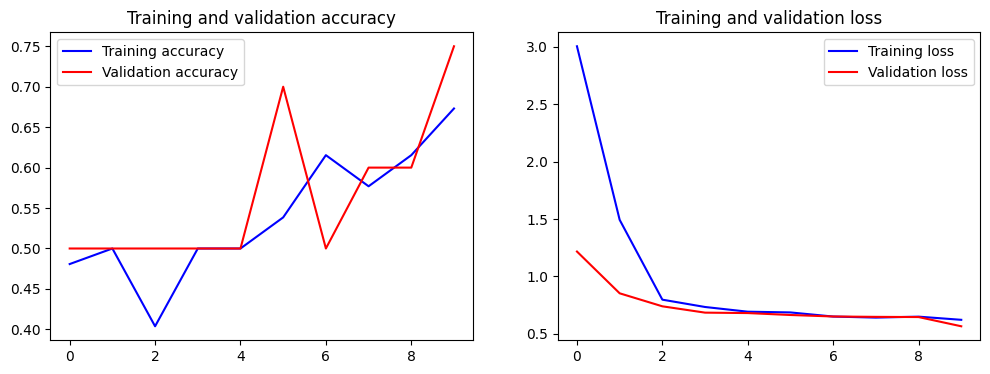

1/1 [==============================] - 1s 630ms/step - loss: 0.5655 - accuracy: 0.7500
Validation accuracy: 75.00%
1/1 [==============================] - 0s 353ms/step


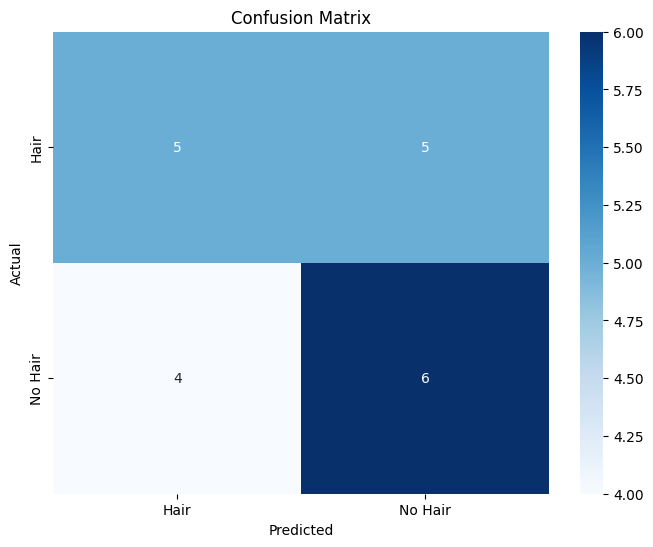

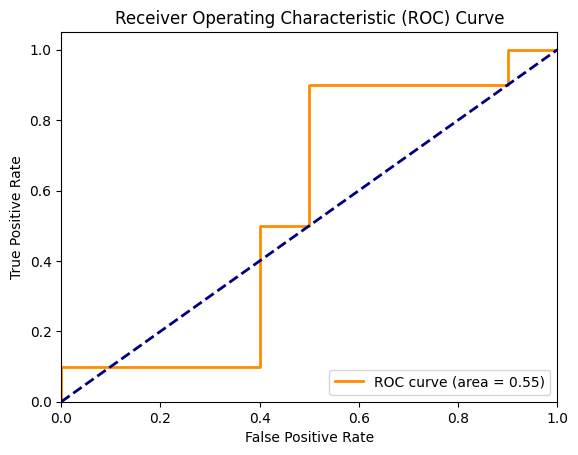

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training & validation accuracy and loss values
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# Predict classes for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype('int').ravel()
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hair', 'No Hair'], yticklabels=['Hair', 'No Hair'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Saving row-11-column-3 - Copy.jpg to row-11-column-3 - Copy.jpg
1/1 [==============================] - 0s 108ms/step


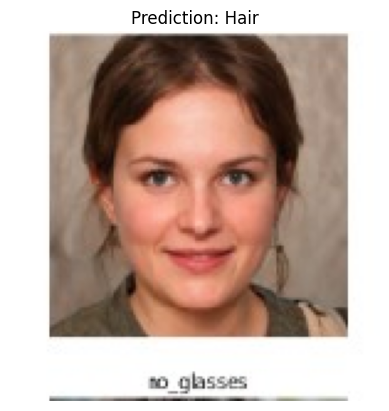

Prediction: Hair


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image


# Upload the image to Colab
uploaded = files.upload()

# Assuming only one file is uploaded
for img_name in uploaded.keys():
    # Load the image
    img_path = img_name
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    # Predict using the trained model
    prediction = model.predict(img_array)
    predicted_class = 'Hair' if prediction[0] < 0.5 else 'No Hair'

    # Display the prediction result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

    print(f"Prediction: {predicted_class}")

In [ ]:
# Save the model to an H5 file
model.save('hair_no_hair_classifier.h5')

In [ ]:
import tensorflow as tf

# Check the current TensorFlow version
print("Current TensorFlow version:", tf.__version__)

# If you need to install a specific version, uncomment the following line and specify the desired version
# !pip install tensorflow==2.8.0


Current TensorFlow version: 2.15.0
